In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import dask.dataframe as dd

df = dd.read_parquet('/content/drive/MyDrive/yellow_tripdata_clean.parquet2')

FileNotFoundError: An error occurred while calling the read_parquet method registered to the pandas backend.
Original Message: /content/drive/MyDrive/yellow_tripdata_clean.parquet2

In [ ]:
df.head()

VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2   2015-01-15 19:23:42                1           1.59   
1         1   2015-01-10 20:53:28                1           3.30   
2         1   2015-01-10 20:43:41                1           1.80   
3         1   2015-01-10 20:52:58                1           3.00   
4         1   2015-01-10 20:53:52                1           9.00   

   pickup_longitude  pickup_latitude  RateCodeID  dropoff_longitude  \
0        -73.993896        40.750111           1         -73.974785   
1        -74.001648        40.724243           1         -73.994415   
2        -73.963341        40.802788           1         -73.951820   
3        -73.971176        40.762428           1         -74.004181   
4        -73.874374        40.774048           1         -73.986977   

   dropoff_latitude  payment_type  ...  tolls_amount  improvement_surcharge  \
0         40.750618             1  ...          0.00                    0.3   
1         40.759109             1  ...          0.00                    0.3   
2         40.824413             2  ...          0.00                    0.3   
3         40.742653             2  ...          0.00                    0.3   
4         40.758194             1  ...          5.33                    0.3   

   total_amount  pickup_date  pickup_day  pickup_hour  pickup_dayofweek  \
0         17.05   2015-01-15          15           19                 3   
1         17.80   2015-01-10          10           20                 5   
2         10.80   2015-01-10          10           20                 5   
3         16.30   2015-01-10          10           20                 5   
4         40.33   2015-01-10          10           20                 5   

  pickup_month  pickup_year  trip_duration_min  
0            1         2015          18.050000  
1            1         2015          19.833333  
2            1         2015          10.050000  
3            1         2015          19.316667  
4            1         2015          20.216667  

[5 rows x 24 columns]

In [ ]:
# Number of columns (safe, no compute needed)
n_cols = len(df.columns)

# Number of rows (requires compute)
n_rows = df.shape[0].compute()

print(f"Rows: {n_rows}, Columns: {n_cols}")

Rows: 8518771, Columns: 24


In [ ]:
df['trip_distance'].max()


20.0

In [ ]:
df = df[df['trip_duration_min']>5].compute()

In [ ]:
df['trip_duration_min'].max()

30.333333333333332

In [ ]:
df.shape

(8225126, 24)

In [ ]:
df.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'RateCodeID',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'pickup_date', 'pickup_day',
       'pickup_hour', 'pickup_dayofweek', 'pickup_month', 'pickup_year',
       'trip_duration_min'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(f'{col}:')
  print(f'{df[col].describe()}')
  print('--'*30)

VendorID:
count    8.225126e+06
mean     1.538823e+00
std      4.984905e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: VendorID, dtype: float64
------------------------------------------------------------
tpep_dropoff_datetime:
count                          8225126
mean     2015-01-16 14:23:58.578814464
min                2015-01-01 00:06:41
25%                2015-01-09 10:18:48
50%         2015-01-16 12:36:04.500000
75%                2015-01-23 19:32:10
max                2015-02-01 00:29:36
Name: tpep_dropoff_datetime, dtype: object
------------------------------------------------------------
passenger_count:
count    8.225126e+06
mean     1.701999e+00
std      1.354517e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64
------------------------------------------------------------
trip_distance:
count    8.2251

In [ ]:
max = df['fare_amount'].max()
df[df['fare_amount']==max]

VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
8334365         1   2015-01-22 21:20:36                1            1.7   

         pickup_longitude  pickup_latitude  RateCodeID  dropoff_longitude  \
8334365        -73.961533        40.770638           1         -73.978508   

         dropoff_latitude  payment_type  ...  tolls_amount  \
8334365         40.749516             2  ...           0.0   

         improvement_surcharge  total_amount  pickup_date  pickup_day  \
8334365                    0.3        4009.3   2015-01-22          22   

         pickup_hour  pickup_dayofweek pickup_month  pickup_year  \
8334365           21                 3            1         2015   

         trip_duration_min  
8334365           8.166667  

[1 rows x 24 columns]

In [ ]:
df[df['fare_amount']>=300]

VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
1954741         1   2015-01-06 01:05:46                2            5.8   
5129031         1   2015-01-20 09:13:17                1            1.7   
7101749         1   2015-01-04 05:55:00                3            8.7   
8334365         1   2015-01-22 21:20:36                1            1.7   

         pickup_longitude  pickup_latitude  RateCodeID  dropoff_longitude  \
1954741        -73.992058        40.701698           5         -74.012245   
5129031        -73.988586        40.768974           2         -73.973167   
7101749        -73.873367        40.774147           5         -73.829117   
8334365        -73.961533        40.770638           1         -73.978508   

         dropoff_latitude  payment_type  ...  tolls_amount  \
1954741         40.632431             2  ...           0.0   
5129031         40.790337             2  ...           0.0   
7101749         40.686760             2  ...           0.0   
8334365         40.749516             2  ...           0.0   

         improvement_surcharge  total_amount  pickup_date  pickup_day  \
1954741                    0.3        350.30   2015-01-06           6   
5129031                    0.3        415.24   2015-01-20          20   
7101749                    0.0        405.30   2015-01-04           4   
8334365                    0.3       4009.30   2015-01-22          22   

         pickup_hour  pickup_dayofweek pickup_month  pickup_year  \
1954741            0                 1            1         2015   
5129031            9                 1            1         2015   
7101749            5                 6            1         2015   
8334365           21                 3            1         2015   

         trip_duration_min  
1954741          12.016667  
5129031          10.950000  
7101749          14.816667  
8334365           8.166667  

[4 rows x 24 columns]

In [ ]:
max_p = df['passenger_count'].max()
df[df['passenger_count']==max_p]

VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
962164         1   2015-01-02 22:34:13                9            9.6   

        pickup_longitude  pickup_latitude  RateCodeID  dropoff_longitude  \
962164        -73.993332        40.747391           1         -73.977203   

        dropoff_latitude  payment_type  ...  tolls_amount  \
962164         40.647255             1  ...          5.33   

        improvement_surcharge  total_amount  pickup_date  pickup_day  \
962164                    0.0         42.13   2015-01-02           2   

        pickup_hour  pickup_dayofweek pickup_month  pickup_year  \
962164           22                 4            1         2015   

        trip_duration_min  
962164          25.833333  

[1 rows x 24 columns]

In [ ]:
df[df['passenger_count']>6]

VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
962164          1   2015-01-02 22:34:13                9            9.6   
1227079         1   2015-01-01 21:42:22                7            1.4   
1510924         1   2015-01-28 23:04:34                7            8.4   
2037558         1   2015-01-04 18:07:42                8            3.2   
2473937         1   2015-01-21 20:04:06                7            1.3   
4108321         1   2015-01-03 17:15:09                7            3.4   
7141933         1   2015-01-18 03:46:26                7            6.9   

         pickup_longitude  pickup_latitude  RateCodeID  dropoff_longitude  \
962164         -73.993332        40.747391           1         -73.977203   
1227079        -74.005867        40.740643           1         -73.988045   
1510924        -73.986877        40.750721           1         -73.849419   
2037558        -73.966995        40.772770           1         -74.002388   
2473937        -73.994057        40.741486           1         -73.989792   
4108321        -73.953964        40.781952           1         -73.987457   
7141933        -73.989998        40.756947           1         -73.942039   

         dropoff_latitude  payment_type  ...  tolls_amount  \
962164          40.647255             1  ...          5.33   
1227079         40.735100             1  ...          0.00   
1510924         40.728916             1  ...          5.33   
2037558         40.744953             1  ...          0.00   
2473937         40.757236             1  ...          0.00   
4108321         40.748112             1  ...          0.00   
7141933         40.710915             1  ...          0.00   

         improvement_surcharge  total_amount  pickup_date  pickup_day  \
962164                     0.0         42.13   2015-01-02           2   
1227079                    0.0         11.75   2015-01-01           1   
1510924                    0.3         36.13   2015-01-28          28   
2037558                    0.0         18.35   2015-01-04           4   
2473937                    0.3         11.15   2015-01-21          21   
4108321                    0.0         18.35   2015-01-03           3   
7141933                    0.3         30.35   2015-01-18          18   

         pickup_hour  pickup_dayofweek pickup_month  pickup_year  \
962164            22                 4            1         2015   
1227079           21                 3            1         2015   
1510924           22                 2            1         2015   
2037558           17                 6            1         2015   
2473937           19                 2            1         2015   
4108321           17                 5            1         2015   
7141933            3                 6            1         2015   

         trip_duration_min  
962164           25.833333  
1227079          10.100000  
1510924          15.666667  
2037558          17.383333  
2473937           9.383333  
4108321          14.950000  
7141933          23.933333  

[7 rows x 24 columns]

In [ ]:
df['fare_amount_per_km'] = df['fare_amount']/df['trip_distance']

In [ ]:
df['fare_amount_per_km'].describe()

count    8.225126e+06
mean     4.861527e+00
std      1.538236e+00
min      5.405405e-04
25%      3.953488e+00
50%      4.716981e+00
75%      5.555556e+00
max      2.357647e+03
Name: fare_amount_per_km, dtype: float64

In [ ]:
df['fare_amount_per_km'].max()

2357.6470588235293

In [ ]:
df['fare_amount_per_km'].min()

0.0005405405405405405

In [ ]:
df = df[df['fare_amount_per_km']>=1]

In [ ]:
df = df[df['fare_amount_per_km']<=20]

In [ ]:
df.shape

(8223327, 25)

In [ ]:
df['fare_amount_per_km'].describe()

count    8.223327e+06
mean     4.858574e+00
std      1.258305e+00
min      1.000000e+00
25%      3.953488e+00
50%      4.716981e+00
75%      5.555556e+00
max      2.000000e+01
Name: fare_amount_per_km, dtype: float64

In [ ]:
df['fare_amount_per_km_per_person'] = df['fare_amount_per_km']/df['passenger_count']

In [ ]:
df['fare_amount_per_km_per_person'].describe()

count    8.223327e+06
mean     3.928243e+00
std      1.833723e+00
min      2.604167e-01
25%      2.596154e+00
50%      4.075235e+00
75%      5.192308e+00
max      2.000000e+01
Name: fare_amount_per_km_per_person, dtype: float64

In [ ]:
df = df[df['fare_amount_per_km_per_person']>=0.5]

In [ ]:
df.head()

VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2   2015-01-15 19:23:42                1           1.59   
1         1   2015-01-10 20:53:28                1           3.30   
2         1   2015-01-10 20:43:41                1           1.80   
3         1   2015-01-10 20:52:58                1           3.00   
4         1   2015-01-10 20:53:52                1           9.00   

   pickup_longitude  pickup_latitude  RateCodeID  dropoff_longitude  \
0        -73.993896        40.750111           1         -73.974785   
1        -74.001648        40.724243           1         -73.994415   
2        -73.963341        40.802788           1         -73.951820   
3        -73.971176        40.762428           1         -74.004181   
4        -73.874374        40.774048           1         -73.986977   

   dropoff_latitude  payment_type  ...  total_amount  pickup_date  pickup_day  \
0         40.750618             1  ...         17.05   2015-01-15          15   
1         40.759109             1  ...         17.80   2015-01-10          10   
2         40.824413             2  ...         10.80   2015-01-10          10   
3         40.742653             2  ...         16.30   2015-01-10          10   
4         40.758194             1  ...         40.33   2015-01-10          10   

   pickup_hour  pickup_dayofweek  pickup_month  pickup_year trip_duration_min  \
0           19                 3             1         2015         18.050000   
1           20                 5             1         2015         19.833333   
2           20                 5             1         2015         10.050000   
3           20                 5             1         2015         19.316667   
4           20                 5             1         2015         20.216667   

   fare_amount_per_km  fare_amount_per_km_per_person  
0            7.547170                       7.547170  
1            4.393939                       4.393939  
2            5.277778                       5.277778  
3            5.000000                       5.000000  
4            3.000000                       3.000000  

[5 rows x 26 columns]

In [ ]:
df = df[df['fare_amount_per_km_per_person']<=10]

In [ ]:
df.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'RateCodeID',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'pickup_date', 'pickup_day',
       'pickup_hour', 'pickup_dayofweek', 'pickup_month', 'pickup_year',
       'trip_duration_min', 'fare_amount_per_km',
       'fare_amount_per_km_per_person'],
      dtype='object')

In [ ]:
df['fare_amount_per_km_per_person'].describe()

count    8.196933e+06
mean     3.917064e+00
std      1.799307e+00
min      5.000000e-01
25%      2.600000e+00
50%      4.074074e+00
75%      5.185185e+00
max      1.000000e+01
Name: fare_amount_per_km_per_person, dtype: float64

In [ ]:
df['RateCodeID'].unique()

array([ 1,  2,  5,  3,  4, 99,  6])

In [ ]:
import dask.dataframe as dd

df1 = dd.read_parquet('/content/drive/MyDrive/yellow_tripdata_clean_final100.parquet')

In [ ]:
df1 = df1

In [ ]:
df1.head()

VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2   2015-01-15 19:23:42                1           1.59   
1         1   2015-01-10 20:53:28                1           3.30   
2         1   2015-01-10 20:43:41                1           1.80   
3         1   2015-01-10 20:52:58                1           3.00   
4         1   2015-01-10 20:53:52                1           9.00   

   pickup_longitude  pickup_latitude  RateCodeID  dropoff_longitude  \
0        -73.993896        40.750111           1         -73.974785   
1        -74.001648        40.724243           1         -73.994415   
2        -73.963341        40.802788           1         -73.951820   
3        -73.971176        40.762428           1         -74.004181   
4        -73.874374        40.774048           1         -73.986977   

   dropoff_latitude  payment_type  ...  total_amount  pickup_date  pickup_day  \
0         40.750618             1  ...         17.05   2015-01-15          15   
1         40.759109             1  ...         17.80   2015-01-10          10   
2         40.824413             2  ...         10.80   2015-01-10          10   
3         40.742653             2  ...         16.30   2015-01-10          10   
4         40.758194             1  ...         40.33   2015-01-10          10   

   pickup_hour  pickup_dayofweek  pickup_month  pickup_year trip_duration_min  \
0           19                 3             1         2015         18.050000   
1           20                 5             1         2015         19.833333   
2           20                 5             1         2015         10.050000   
3           20                 5             1         2015         19.316667   
4           20                 5             1         2015         20.216667   

   fare_amount_per_km  fare_amount_per_km_per_person  
0            7.547170                       7.547170  
1            4.393939                       4.393939  
2            5.277778                       5.277778  
3            5.000000                       5.000000  
4            3.000000                       3.000000  

[5 rows x 26 columns]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_pd = df1.compute()

In [ ]:
coords = df_pd[['pickup_latitude', 'pickup_longitude']]

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

In [ ]:
df_pd['pickup_zone'] = kmeans.fit_predict(coords)

In [3]:
import dask.dataframe as dd

df1 = dd.read_parquet('/content/drive/MyDrive/yellow_tripdata_clean_final_removed_column_1.parquet')

In [4]:
df1.head()

VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2   2015-01-15 19:23:42                1           1.59   
1         1   2015-01-10 20:53:28                1           3.30   
2         1   2015-01-10 20:43:41                1           1.80   
3         1   2015-01-10 20:52:58                1           3.00   
4         1   2015-01-10 20:53:52                1           9.00   

   pickup_longitude  pickup_latitude  RateCodeID  dropoff_longitude  \
0        -73.993896        40.750111           1         -73.974785   
1        -74.001648        40.724243           1         -73.994415   
2        -73.963341        40.802788           1         -73.951820   
3        -73.971176        40.762428           1         -74.004181   
4        -73.874374        40.774048           1         -73.986977   

   dropoff_latitude  payment_type  ...  pickup_date  pickup_day  pickup_hour  \
0         40.750618             1  ...   2015-01-15          15           19   
1         40.759109             1  ...   2015-01-10          10           20   
2         40.824413             2  ...   2015-01-10          10           20   
3         40.742653             2  ...   2015-01-10          10           20   
4         40.758194             1  ...   2015-01-10          10           20   

   pickup_dayofweek  pickup_month  pickup_year  trip_duration_min  \
0                 3             1         2015          18.050000   
1                 5             1         2015          19.833333   
2                 5             1         2015          10.050000   
3                 5             1         2015          19.316667   
4                 5             1         2015          20.216667   

  fare_amount_per_km  fare_amount_per_km_per_person  pickup_zone  
0           7.547170                       7.547170           49  
1           4.393939                       4.393939           43  
2           5.277778                       5.277778           28  
3           5.000000                       5.000000           48  
4           3.000000                       3.000000            1  

[5 rows x 27 columns]

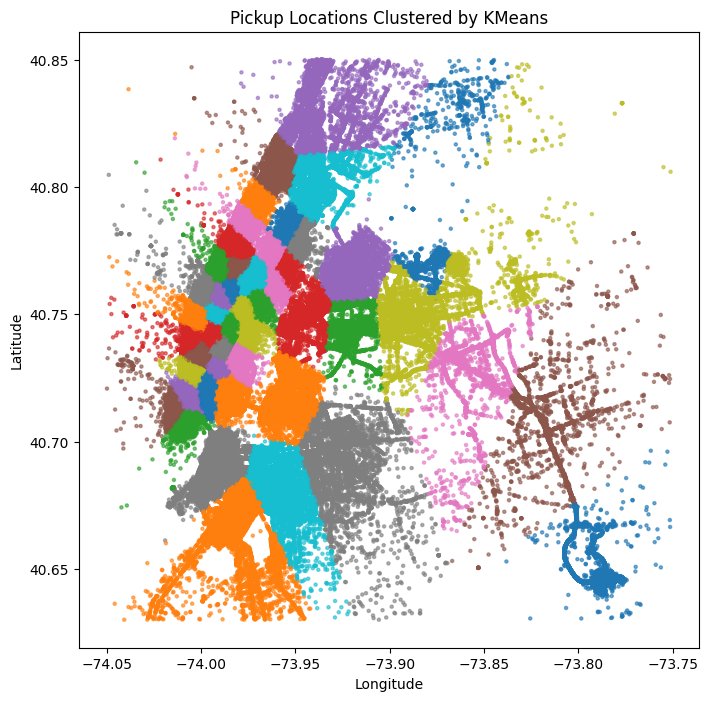

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe with 'pickup_latitude' and 'pickup_longitude'
plt.figure(figsize=(8, 8))
plt.scatter(
    df1['pickup_longitude'],
    df1['pickup_latitude'],
    c=df1['pickup_zone'],
    cmap='tab10',
    s=5, alpha=0.6
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Pickup Locations Clustered by KMeans")
plt.show()


In [9]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [13]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# ---------- STEP 1: Center Map (convert Dask scalar to float) ----------
map_center = [
    df1['pickup_latitude'].mean().compute(),
    df1['pickup_longitude'].mean().compute()
]
m = folium.Map(location=map_center, zoom_start=12)

# ---------- STEP 2: Setup Colors ----------
n_clusters = df1['pickup_zone'].nunique().compute()  # cluster count from Dask
colormap = cm.get_cmap('tab10', n_clusters)
norm = colors.Normalize(vmin=0, vmax=n_clusters - 1)

# ---------- STEP 3: Sample and Convert to Pandas ----------
sample_df = df1.sample(frac=0.001).compute()  # sample for performance

# ---------- STEP 4: Add Points ----------
for _, row in sample_df.iterrows():
    cluster_id = row['pickup_zone']
    color = colors.rgb2hex(colormap(norm(cluster_id)))

    folium.CircleMarker(
        location=[row['pickup_latitude'], row['pickup_longitude']],
        radius=2,
        color=color,
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# ---------- STEP 5: Show Map ----------
m


/tmp/ipython-input-967873923.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10', n_clusters)


In [14]:
import dask.dataframe as dd

# ✅ Step 1: Compute fare per km (avoid divide by zero)
df1 = df1[df1['trip_distance'] > 0]  # remove invalid trips
df1 = df1.assign(fare_per_km=df1['fare_amount'] / df1['trip_distance'])

# ✅ Step 2: Group by pickup_zone, dayofweek, and hour
agg_df1 = df1.groupby(
    ['pickup_zone', 'pickup_dayofweek', 'pickup_hour']
).agg({
    'fare_per_km': 'mean',          # target: normalized fare
    'trip_distance': 'mean',        # avg distance (feature)
    'fare_amount': 'mean',          # avg raw fare (optional)
    'fare_amount': 'count'          # ride_count (demand proxy)
}).rename(columns={
    'fare_per_km': 'avg_fare_per_km',
    'trip_distance': 'avg_trip_distance',
    'fare_amount': 'avg_fare_amount',
    'fare_amount': 'ride_count'
})

# ✅ Step 3: Convert to Pandas for ML modeling
agg_df1 = agg_df1.compute().reset_index()

print(agg_df1.head())


   pickup_zone  pickup_dayofweek  pickup_hour  avg_fare_per_km  \
0           49                 3           19         5.311793   
1           43                 5           20         5.471584   
2           28                 5           20         4.425589   
3           48                 5           20         4.640528   
4            1                 5           20         3.092265   

   avg_trip_distance  ride_count  
0           2.345760        4340  
1           2.381533        2100  
2           3.014066         782  
3           2.555284        1991  
4           8.718366         857  


In [19]:
agg_df1.describe()

pickup_zone  pickup_dayofweek  pickup_hour  avg_fare_per_km  \
count  8399.000000       8399.000000  8399.000000      8399.000000   
mean     24.497678          3.000238    11.501012         4.512524   
std      14.431019          2.000119     6.922389         0.686805   
min       0.000000          0.000000     0.000000         2.873178   
25%      12.000000          1.000000     6.000000         4.036695   
50%      24.000000          3.000000    12.000000         4.433304   
75%      37.000000          5.000000    17.500000         5.009253   
max      49.000000          6.000000    23.000000         6.390793   

       avg_trip_distance   ride_count  
count        8399.000000  8399.000000  
mean            3.629109   975.941541  
std             1.879919   952.950777  
min             1.610000     1.000000  
25%             2.492611   183.000000  
50%             3.134444   723.000000  
75%             3.921911  1481.000000  
max            15.351815  6860.000000

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# ----- Features and Target -----
X = agg_df1[['pickup_zone', 'pickup_dayofweek', 'pickup_hour', 'ride_count', 'avg_trip_distance']]
y = agg_df1['avg_fare_per_km']   # Target (normalized fare)

# ----- Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Preprocessing -----
categorical_features = ['pickup_zone', 'pickup_dayofweek', 'pickup_hour']
numeric_features = ['ride_count', 'avg_trip_distance']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# ----- Model -----
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# assume X, y, and `model` (pipeline) are defined as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)       # mean squared error
rmse = mse ** 0.5                               # root mean squared error
mae = mean_absolute_error(y_test, y_pred)       # mean absolute error
r2 = r2_score(y_test, y_pred)                   # R^2

print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R2:   {r2:.4f}")




MSE:  0.0247
RMSE: 0.1572
MAE:  0.1103
R2:   0.9472


XGBoost Performance on Normal Fare Price Prediction:
MSE:  0.0192
RMSE: 0.1386
MAE:  0.0946
R2:   0.9590


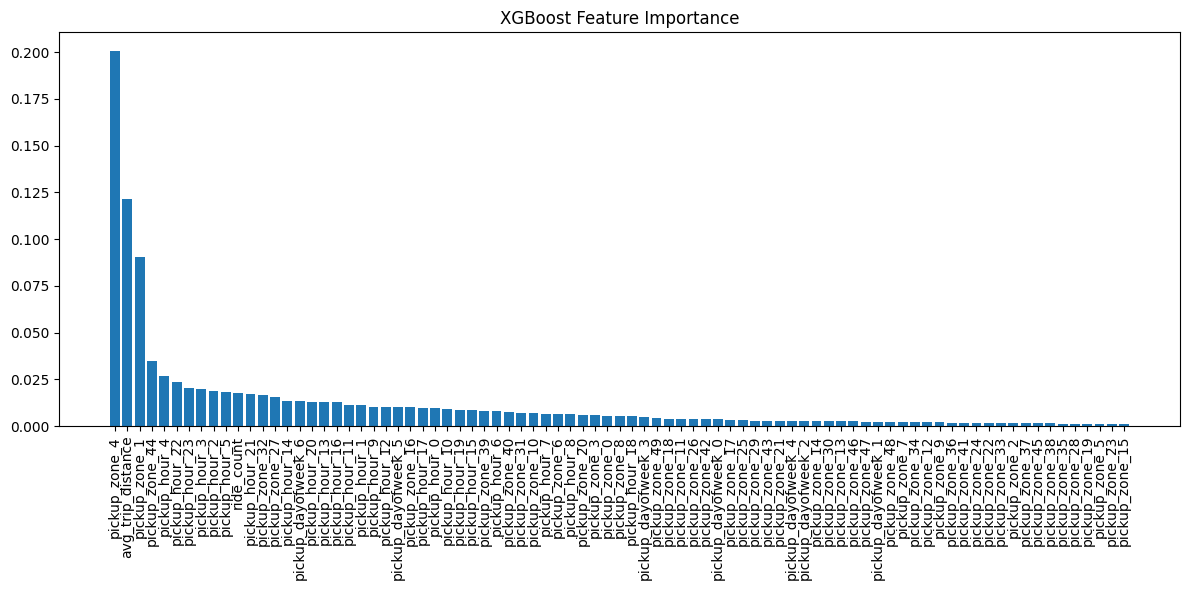

In [25]:
# ----------------------------
# Imports
# ----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# ----------------------------
# Assume agg_df is already prepared with these columns:
# ['pickup_zone','pickup_dayofweek','pickup_hour','ride_count','avg_trip_distance','avg_fare_amount']
# ----------------------------
df = agg_df1.copy()

# ----------------------------
# Step 1: Features & Target
# ----------------------------
X = df[['pickup_zone','pickup_dayofweek','pickup_hour','ride_count','avg_trip_distance']]
y = df['avg_fare_per_km']

# ----------------------------
# Step 2: Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Step 3: Preprocessing
# ----------------------------
cat_features = ['pickup_zone','pickup_dayofweek','pickup_hour']
num_features = ['ride_count','avg_trip_distance']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
    ('num', StandardScaler(), num_features)
])

# ----------------------------
# Step 4: XGBoost Regressor
# ----------------------------
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# ----------------------------
# Step 5: Train the Model
# ----------------------------
pipeline.fit(X_train, y_train)

# ----------------------------
# Step 6: Predict & Evaluate
# ----------------------------
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Performance on Normal Fare Price Prediction:")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R2:   {r2:.4f}")

# ----------------------------
# Step 7: Feature Importance
# ----------------------------
# Extract the trained XGBoost model from the pipeline
xgb_model_fitted = pipeline.named_steps['model']

# Get feature names after one-hot encoding
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_features)
feature_names = np.concatenate([ohe_feature_names, num_features])

# Plot feature importance
importances = xgb_model_fitted.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("XGBoost Feature Importance")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [26]:
!apt-get install git -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [27]:
!git config --global user.email "er.rkjangir9602@gmail.com"
!git config --global user.name "Ramk416"

In [29]:
!git clone https://github.com/username/surge_price_model.git
%cd surge_price_model


fatal: destination path 'surge_price_model' already exists and is not an empty directory.
/content/surge_price_model


In [32]:
!cp /content/drive/MyDrive/yellow_tripdata_clean_final_removed_column_1.parquet .


In [34]:
!git add yellow_tripdata_clean_final_removed_column_1.parquet
!git commit -m "Add Parquet dataset from Colab"
!git push origin main

[main (root-commit) ed13d92] Add Parquet dataset from Colab
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 yellow_tripdata_clean_final_removed_column_1.parquet
fatal: could not read Username for 'https://github.com': No such device or address


In [36]:
!git clone https://github.com/Ramk416/surge_price_model.git
%cd surge_price_model


Cloning into 'surge_price_model'...
/content/surge_price_model/surge_price_model


In [37]:
!cp /content/taxi_surge.ipynb .

cp: cannot stat '/content/taxi_surge.ipynb': No such file or directory


In [38]:
import shutil

# Save current notebook to /content/
shutil.copy("/content/taxi_surge.ipynb", "/content/taxi_surge_copy.ipynb")


FileNotFoundError: [Errno 2] No such file or directory: '/content/taxi_surge.ipynb'

In [ ]:
df = df1.drop(columns=[
    'payment_type','tpep_dropoff_datetime','fare_amount','extra','mta_tax',
    'tip_amount','tolls_amount','improvement_surcharge','total_amount',
    'trip_duration_min','fare_amount_per_km','fare_amount_per_km_per_person',
    'pickup_date'
])


In [ ]:
df.head()

VendorID  passenger_count  trip_distance  pickup_longitude  \
0         2                1           1.59        -73.993896   
1         1                1           3.30        -74.001648   
2         1                1           1.80        -73.963341   
3         1                1           3.00        -73.971176   
4         1                1           9.00        -73.874374   

   pickup_latitude  RateCodeID  dropoff_longitude  dropoff_latitude  \
0        40.750111           1         -73.974785         40.750618   
1        40.724243           1         -73.994415         40.759109   
2        40.802788           1         -73.951820         40.824413   
3        40.762428           1         -74.004181         40.742653   
4        40.774048           1         -73.986977         40.758194   

   pickup_day  pickup_hour  pickup_dayofweek  pickup_month  pickup_year  
0          15           19                 3             1         2015  
1          10           20                 5             1         2015  
2          10           20                 5             1         2015  
3          10           20                 5             1         2015  
4          10           20                 5             1         2015

In [ ]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'dropoff_longitude',
       'dropoff_latitude', 'pickup_day', 'pickup_hour', 'pickup_dayofweek',
       'pickup_month', 'pickup_year'],
      dtype='object')

In [ ]:
df['is_rush_hour'] = (
    df['pickup_hour'].between(7, 9) | df['pickup_hour'].between(16, 19)
).astype(int)

In [ ]:
df['is_weekend'] = df['pickup_dayofweek'].isin([5, 6]).astype(int)

In [ ]:
df.head()

VendorID  passenger_count  trip_distance  pickup_longitude  \
0         2                1           1.59        -73.993896   
1         1                1           3.30        -74.001648   
2         1                1           1.80        -73.963341   
3         1                1           3.00        -73.971176   
4         1                1           9.00        -73.874374   

   pickup_latitude  RateCodeID  dropoff_longitude  dropoff_latitude  \
0        40.750111           1         -73.974785         40.750618   
1        40.724243           1         -73.994415         40.759109   
2        40.802788           1         -73.951820         40.824413   
3        40.762428           1         -74.004181         40.742653   
4        40.774048           1         -73.986977         40.758194   

   pickup_day  pickup_hour  pickup_dayofweek  pickup_month  pickup_year  \
0          15           19                 3             1         2015   
1          10           20                 5             1         2015   
2          10           20                 5             1         2015   
3          10           20                 5             1         2015   
4          10           20                 5             1         2015   

   is_rush_hour  is_weekend  
0             1           0  
1             0           1  
2             0           1  
3             0           1  
4             0           1

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine, Unit

def calculate_haversine_distance(row):
    # It will pull only the values it needs from each row
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(pickup, dropoff, unit=Unit.KILOMETERS)

In [ ]:
df['trip_distance'] = df.apply(calculate_haversine_distance, axis=1)

In [ ]:
df.head()

VendorID  passenger_count  trip_distance  pickup_longitude  \
0         2                1           1.59        -73.993896   
1         1                1           3.30        -74.001648   
2         1                1           1.80        -73.963341   
3         1                1           3.00        -73.971176   
4         1                1           9.00        -73.874374   

   pickup_latitude  RateCodeID  dropoff_longitude  dropoff_latitude  \
0        40.750111           1         -73.974785         40.750618   
1        40.724243           1         -73.994415         40.759109   
2        40.802788           1         -73.951820         40.824413   
3        40.762428           1         -74.004181         40.742653   
4        40.774048           1         -73.986977         40.758194   

   pickup_day  pickup_hour  pickup_dayofweek  pickup_month  pickup_year  \
0          15           19                 3             1         2015   
1          10           20                 5             1         2015   
2          10           20                 5             1         2015   
3          10           20                 5             1         2015   
4          10           20                 5             1         2015   

   is_rush_hour  is_weekend  
0             1           0  
1             0           1  
2             0           1  
3             0           1  
4             0           1

In [ ]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'dropoff_longitude',
       'dropoff_latitude', 'pickup_day', 'pickup_hour', 'pickup_dayofweek',
       'pickup_month', 'pickup_year', 'is_rush_hour', 'is_weekend'],
      dtype='object')

In [ ]:
# Convert specific columns to categorical
df = df.categorize(columns=['VendorID', 'RateCodeID'])

# Now apply get_dummies
df_processed = dd.get_dummies(df, columns=['VendorID', 'RateCodeID'], drop_first=True)
df_processed = df_processed.astype(float)

In [ ]:
df_processed.head()

passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0              1.0           1.59        -73.993896        40.750111   
1              1.0           3.30        -74.001648        40.724243   
2              1.0           1.80        -73.963341        40.802788   
3              1.0           3.00        -73.971176        40.762428   
4              1.0           9.00        -73.874374        40.774048   

   dropoff_longitude  dropoff_latitude  pickup_day  pickup_hour  \
0         -73.974785         40.750618        15.0         19.0   
1         -73.994415         40.759109        10.0         20.0   
2         -73.951820         40.824413        10.0         20.0   
3         -74.004181         40.742653        10.0         20.0   
4         -73.986977         40.758194        10.0         20.0   

   pickup_dayofweek  pickup_month  pickup_year  is_rush_hour  is_weekend  \
0               3.0           1.0       2015.0           1.0         0.0   
1               5.0           1.0       2015.0           0.0         1.0   
2               5.0           1.0       2015.0           0.0         1.0   
3               5.0           1.0       2015.0           0.0         1.0   
4               5.0           1.0       2015.0           0.0         1.0   

   VendorID_2  RateCodeID_2  RateCodeID_3  RateCodeID_4  RateCodeID_5  \
0         1.0           0.0           0.0           0.0           0.0   
1         0.0           0.0           0.0           0.0           0.0   
2         0.0           0.0           0.0           0.0           0.0   
3         0.0           0.0           0.0           0.0           0.0   
4         0.0           0.0           0.0           0.0           0.0   

   RateCodeID_6  RateCodeID_99  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

In [ ]:
import dask.dataframe as dd

df = dd.read_parquet('/content/drive/MyDrive/yellow_tripdata_clean_final100.parquet')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_pd.to_parquet('/content/drive/MyDrive/yellow_tripdata_clean_final_removed_column_1.parquet', engine='pyarrow')

In [ ]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.7 MB/s eta 0:00:00
